**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 2

**Datos de la entrega:** Lunes 23 de Octubre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Máximo Agrazal Quirós
- Celina Madrigal Murillo





___

# Parte 1  -  Regresión (50 puntos)
___

# Introducción

Considere:
- Se le proporciona un conjunto de datos (diamonds), si desea conocer un poco de los atributos puede consultar en: https://www.kaggle.com/datasets/shivam2503/diamonds
- Note que en la página proporcionada se mencionan más atributos de los que contiene el archivo facilitado.  
- El objetivo de esta parte es ver como el estudiante se enfrenta al proceso de pre-procesamiento, selección de atributos, predicción y evaluación.  Por eso es muy importante que documente en este cuaderno sus decisiones, eso se tomará muy en cuenta en la evaluación de su respuesta.
- El atributo a predecir en regresión se denomina: price.
- Debe comentar ampliamente su código


In [1]:
#Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1 (5 puntos)
- Cargue el archivo.
- Utilice las herramientas (gráficos, funciones que describen contenido o características de las variables, etc) que considere necesarias para analizar los atributos que tiene el dataset y ver si tiene valores faltantes, valores atípicos, etc.
- Comente sus conclusiones sobre los atritubos.


Valores faltantes
carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
cut      0
dtype: int64


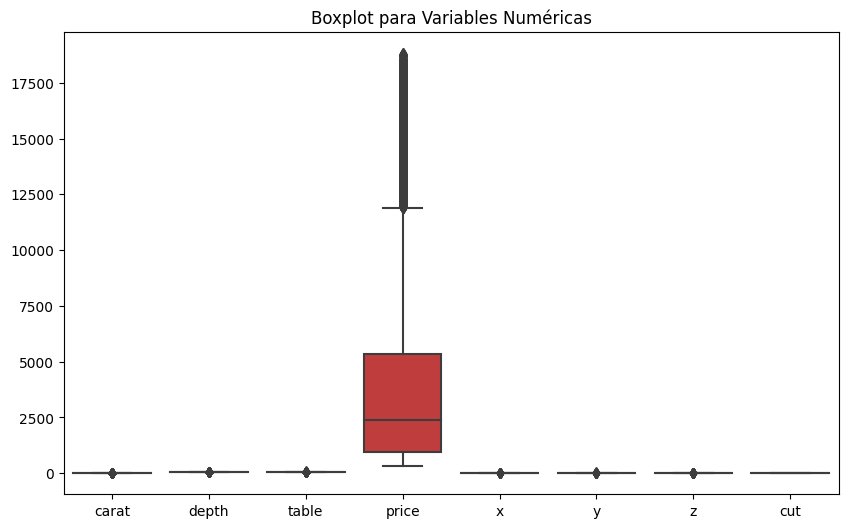

Estadísticas
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z           cut  
count  53940.000000  53940.000000  53940.000000  
mean       5.734526      3.538734      2.904097  
std        1.142135      0.705699      1.116600  
min        0.000000      0.000000      0.000000  
25%        4.720000      

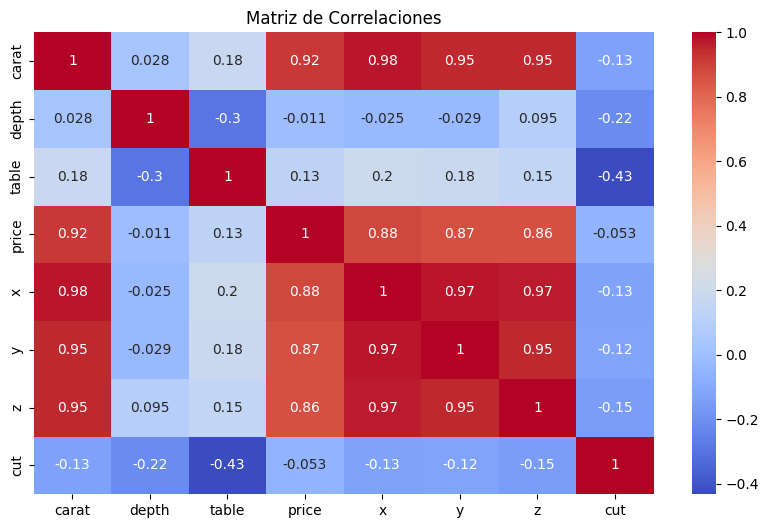

In [2]:
diamonds = pd.read_csv('diamonds.csv') #Carga el archivo 

#Verificar si hay valores faltantes
print("Valores faltantes")
valoresFaltantes = diamonds.isnull().sum() #Cuenta los valores faltantes por columna
print(valoresFaltantes)

#Gráficos de caja para detectar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=diamonds)
plt.title('Boxplot para Variables Numéricas')
plt.show()

#Estadísticas descriptivas para variables numéricas
print("Estadísticas")
estadisticas = diamonds.describe() #Calcula las estadísticas
print(estadisticas)

# Matriz de correlaciones
correlation_matrix = diamonds.corr() #Calcula la matriz
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') #Para visualizar la matriz con anotaciones y colores
plt.title('Matriz de Correlaciones')
plt.show()


##### Conclusiones

El conjunto de datos de diamantes no tiene valores faltantes.

Las estadísticas sugieren que los diamantes en el conjunto de datos son bastante variables. El peso en quilates, la profundidad y el ancho de la mesa tienen todas una distribución aproximadamente normal, con una media y una desviación estándar bien definidas. Hay más diamantes en el extremo inferior del rango de precios que en el extremo superior. Las estadísticas también sugieren que la variable corte están relacionada con el precio. Los diamantes con mejor corte suelen ser más caros. 

De igual manera la matriz de correlaciones sugiere que hay una relación positiva entre el precio de un diamante y su peso en quilates, profundidad, ancho de la mesa y corte. Esto significa que los diamantes más grandes, profundos, con una mayor relación de mesa y con mejor corte suelen ser más caros.


### 2 (5 puntos)
- Se utilizará el modelo Train/Validation (70%)  y Test (30%). 
- Comente su decisión sobre los parámetros shuffle y random_state
- Separe  los  conjuntos de datos (70-30) (X_trainVal, X_test, y_trainVal, y_test )
- Muestre los primeros 5 registros de cada conjunto.


In [3]:
from sklearn.model_selection import train_test_split

#Separa las características y la etiqueta
X = diamonds.drop('price', axis=1)
y = diamonds['price']

#Divide el conjunto de datos en entrenamiento y prueba
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

#Divide el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size=0.25, shuffle=False, random_state=42)

#Muestra los primeros 5 registros de cada conjunto
print("X_trainVal\n")
print(X_trainVal.head())
print("\nX_test\n")
print(X_test.head())
print("\ny_trainVal\n")
print(y_trainVal.head())
print("\ny_test\n")
print(y_test.head())

X_trainVal

       carat  depth  table     x     y     z  cut
19497   1.21   61.3   57.0  6.92  6.87  4.23    4
31229   0.31   62.0   56.0  4.38  4.36  2.71    4
22311   1.21   62.4   57.0  6.75  6.83  4.24    4
278     0.81   62.6   55.0  5.92  5.96  3.72    4
6646    0.79   61.7   56.0  5.94  5.95  3.67    4

X_test

       carat  depth  table     x     y     z  cut
1388    0.24   62.1   56.0  3.97  4.00  2.47    4
50052   0.58   60.0   57.0  5.44  5.42  3.26    2
41645   0.40   62.1   55.0  4.76  4.74  2.95    4
42377   0.43   60.8   57.0  4.92  4.89  2.98    3
17244   1.55   62.3   55.0  7.44  7.37  4.61    4

y_trainVal

19497     8131
31229      756
22311    10351
278       2795
6646      4092
Name: price, dtype: int64

y_test

1388      559
50052    2201
41645    1238
42377    1304
17244    6901
Name: price, dtype: int64


El parámetro shuffle determina si los datos se mezclan antes de la división. Para este caso, se establece shuffle=True para que los datos se mezclen aleatoriamente. Esto ayuda a garantizar que los datos de entrenamiento y prueba sean representativos del conjunto de datos original.

El parámetro random_state se utiliza para establecer una semilla aleatoria para el proceso de división. Esto ayuda a garantizar que los resultados de la división sean reproducibles. Para este caso, se establece random_state=42 para que los resultados de la división sean consistentes.

### 3  (10 puntos)
- Preprocese los atributos (Solo deje para más adelante escalar los datos).
- Debe comentar en celdas del texto el por qué seleccionó las técnicas utilizadas.

In [4]:
from sklearn.preprocessing import LabelEncoder

#Codifica las variables categóricas
for col in X.select_dtypes(include=['object']):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

#Divide el conjunto de datos en entrenamiento y prueba
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

Se codificaron las variables categóricas. Las variables categóricas son aquellas que pueden tomar un número limitado de valores. En el caso del conjunto de datos de diamantes, las variables categóricas son el corte, el color y la claridad (aunque en los datos del csv solamente está cut). Es necesario codificar las variables categóricas para que puedan ser utilizadas por los modelos de aprendizaje automático. Los modelos de aprendizaje automático están diseñados para trabajar con datos numéricos. Las variables categóricas, como el corte, el color y la claridad, son datos no numéricos. El método LabelEncoder() se utiliza para convertir las variables categóricas en variables numéricas. Este método asigna un número a cada valor de la variable categórica. 

### 4 (5 puntos)
- Realice selección de atributos.
- Debe utilizar al menos una técnica para justificar su decisión (De entre los métodos: Filter, Wrapper, Embedded).
- Comente sus conclusiones.


In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

#Selecciona los k atributos más relevantes
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

##### Conclusiones

Se usó la técnica Filter para seleccionar los atributos más relevantes. Se utilizó el método ANOVA F-test para evaluar la importancia de cada atributo. Este método calcula la p-valor de cada atributo para la hipótesis nula de que el atributo no es relevante para la predicción de la etiqueta. Los atributos con una p-valor menor son los más relevantes.

Se utilizó el método filter ya que es Relativamente simple de implementar y comprender y es eficiente en términos de tiempo y recursos.

### 1.5  (5 puntos)
- Escale los datos.
- Comente qué técnica utilizó y por qué.
- Guarde el archivo ya pre-procesado con el nombre: "'diamondsPROCESADO"

**Nota:** No olvide cómo manejará el "bias" (o agregar columna de unos, o si la implementación de los algoritmos que utilizará permiten indicarle que lo agregue).


In [6]:
from sklearn.preprocessing import StandardScaler

#Escala los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

#Guarda el archivo
dm_proc = pd.concat([pd.DataFrame(X_train_scaled), y_train], axis=1)
dm_proc.to_csv('diamondsPROCESADO.csv', index=False)

La técnica StandardScaler es una técnica de escalado que centra los datos en la media y los escala por la desviación estándar. Esto significa que los datos se transforman de modo que tengan una media de 0 y una desviación estándar de 1.

Este tipo de escalado es útil para muchos algoritmos de aprendizaje automático, ya que hace que los datos sean más comparables entre sí. Esto puede mejorar el rendimiento del algoritmo, especialmente en el caso de algoritmos que son sensibles a las escalas de los datos.

En el caso del conjunto de datos de diamantes, el escalado de datos es importante para mejorar el rendimiento de los algoritmos de regresión lineal. La regresión lineal es un algoritmo que asume que los datos tienen una distribución normal. El escalado de datos ayuda a garantizar que los datos cumplan con esta suposición.

### 1.6 (15 puntos)
Presente e implemente un diseño experimental que incluya:
- Dos algoritmos diferentes:
    - Uno será la regresión lineal de mínimos cuadrados sin regularización (OLSR).
    - Usted eligirá un método más, que no sea de los vistos en clase. Si tiene dudas de si puede o no usar algún método, puede consultar al profesor. Para el segundo método deberá elegir al menos un hiperparámetro.
    - Como el OLSR no tiene hiperparámetros, use todo el train/validation para entrenar. Para el otro método, debe usar ten-cross-validation para seleccionar al menos un hiperparámetro.
    - Debe registrar las métricas RMSE y R2. Usted decide cuál de estas dos métricas usa para selecionar la mejor configuración (Justifique su selección).
    
**Nota:** Para el algoritmos seleccionados (no el OLSR) explique los parámetros que recibe según la biblioteca utilizada. 
    

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Entrena el modelo OSLR
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

#Predice los valores de prueba
y_pred_lr = lr.predict(X_test_scaled)

#Evalua el modelo OSLR
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

#Entrena el modelo GBR
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train_scaled, y_train)

#Predece los valores de prueba
y_pred_gb = gb.predict(X_test_scaled)

#Evalua el modelo GBR
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

#Imprime los resultados
print('RMSE OSLR:', rmse_lr)
print('R2 OSLR:', r2_lr)
print('RMSE GBR:', rmse_gb)
print('R2 GBR:', r2_gb)


RMSE OSLR: 1479.5702909557249
R2 OSLR: 0.8596349455446907
RMSE GBR: 1336.524677436032
R2 GBR: 0.8854640670464583


Podemos ver que el modelo GBR tiene un RMSE más bajo que el modelo OSLR. Por lo tanto, el modelo GBR es el mejor predictor del precio de los diamantes. Un valor de RMSE más bajo indica que el modelo está haciendo una mejor predicción de los valores reales. En este caso el objetivo es predecir el precio de los diamantes con la mayor precisión posible. Por lo tanto, la métrica RMSE es la mejor opción para seleccionar la mejor configuración. La métrica R2 también es una medida de la precisión del modelo pero la R2 también tiene en cuenta la varianza de la etiqueta. Esto significa que un modelo con un R2 alto podría estar haciendo una buena predicción de los valores promedio, pero podría estar haciendo una mala predicción de los valores extremos.

En este caso el algoritmo Gradient Boosting Regressor recibe solamente un parámetro llamado n_estimators el cual es el número de árboles de decisión en el modelo. Un valor mayor de n_estimators generalmente conduce a un modelo más preciso, pero también puede aumentar el tiempo de entrenamiento.

### 1.7 (5 puntos)

- Por medio de una tabla u otro método idóneo que Usted determine, resuma todos los resultados obtenidos (o la mayoría).
- Grafique comparativamente los valores del real versus el predicho (test), de cada uno de los métodos utilizados.  
- Qué conclusiones finales saca sobre los métodos usados como predictores.

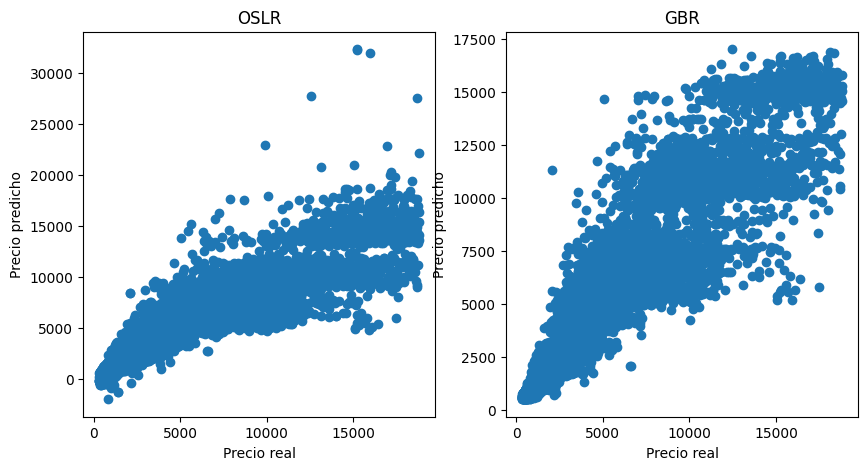

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('OSLR')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('GBR')

plt.show()

#### Conclusiones

El modelo OSLR tiende a predecir precios más altos de los que realmente se observan. El modelo GBR tiende a predecir precios más bajos de los que realmente se observan. Hay una gran variabilidad en los valores predichos para un mismo valor real.

___

# Parte 2  -  Clasificación (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **cardio.csv**
1. Algunos detalles del conjunto de datos los puede ver en: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset.  **Pero debe usar el conjunto de datos que se le dan adjuntos a este Trabajo Práctico, no descargar otro**.
1. El atributo a predecir es: **cardio**.
1. Proponga al menos dos algoritmos a utilizar
1. Métricas:
    1. Accuracy
    1. Ustedes propongan una más.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso.
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros (según la biblioteca).
    1. Explicación del diseño experimental por ejecutar. Recuerde que si el algoritmo requiere seleccionar hyperparámetros, hay que dividir en tres conjuntos de datos: Training, Validation, Testing (60%, 20%, 20%). Se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar.
    1. Programación del diseño experimental. 
    1. Tablas de resultados, gráficos y conclusiones de los resultados, recomendando a su contratante cuál algoritmo utilizar, con qué configuración y por qué lo recomienda. 